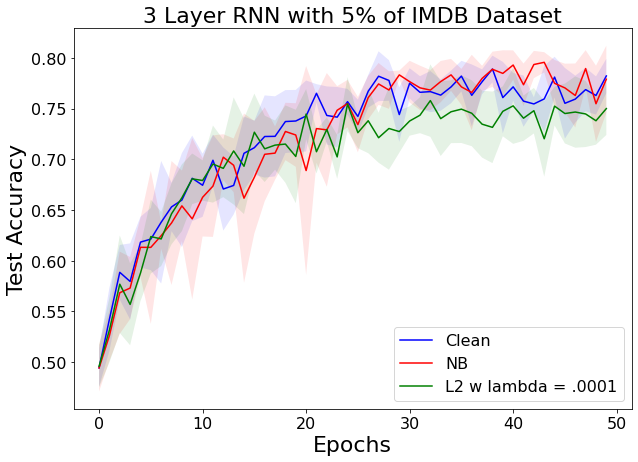

In [9]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

x_values = np.arange(50)

vals = []
for size_pos, size in enumerate(['rnn_imdb-5%-3-layers']):
    l = []
    for type_pos, type in enumerate(['clean', 'NB', 'L2-1e-4']):
        tot_list = []
        for iteration in range(5):
            with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/iteration-{iteration}-{size}-{type}-hist.pkl', 'rb') as file:
                tot_list.append(pickle.load(file)['test_acc'])
        tot_list = np.array(tot_list)
        mean = np.mean(tot_list, axis=0)
        std = np.std(tot_list, axis=0)
        if type == 'clean':
            plt.plot(x_values, mean, 'blue', label='Clean')
            plt.fill_between(x_values, mean-std, mean+std, facecolor='blue', alpha=0.1)
        elif type == 'NB':
            plt.plot(x_values, mean, 'red', label='NB')
            plt.fill_between(x_values, mean-std, mean+std, facecolor='red', alpha=0.1)
        elif type == 'L2-1e-4':
            plt.plot(x_values, mean, 'green', label='L2 w lambda = .0001')
            plt.fill_between(x_values, mean-std, mean+std, facecolor='green', alpha=0.1)
        plt.legend(loc='lower right', fontsize=16)

        plt.title(f'3 Layer RNN with 5% of IMDB Dataset', fontsize=22)
        plt.xlabel('Epochs', fontsize=22)
        plt.ylabel('Test Accuracy', fontsize=22)
        plt.tick_params(axis='y', labelsize=16)
        plt.tick_params(axis='x', labelsize=16)


    vals.append(l)

plt.savefig('rnnimdb3lay.pdf', dpi=1000)

In [6]:
for size in ['rnn_imdb-3-layers', 'rnn_imdb-5%-3-layers', 'rnn_imdb-10%-3-layers']:
    print("{:>15}".format(size))
    print("{:<15}".format("training type"), "{:<15}".format("mean"), "{:<15}".format("std"))
    for type in ['clean', 'NB', 'L2-1e-4']:
        tot_list = []
        for iteration in range(5):
            with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/iteration-{iteration}-{size}-{type}-hist.pkl', 'rb') as file:
                tot_list.append(pickle.load(file)['test_acc'])
        tot_list = np.array(tot_list)
        mean = np.mean(tot_list, axis=0)
        std = np.std(tot_list, axis=0)
        t = type
        pos = np.argmax(mean)
        m = mean[pos]
        st = std[pos]
        ft = "{:<15}".format(t)
        fm = "{:<5}".format(m)
        fs = "{:<5}".format(st)
        print(ft, fm, fs)
    print()

rnn_imdb-3-layers
training type   mean            std            
clean           0.9024187853780843 0.006384704229164784
NB              0.9003001414113125 0.003259723025126185
L2-1e-4         0.8949329097392195 0.0037491786856034093

rnn_imdb-5%-3-layers
training type   mean            std            
clean           0.7889867405096689 0.013158266394206659
NB              0.7955776453018188 0.010004257223455923
L2-1e-4         0.7578314344088237 0.03571989952047896

rnn_imdb-10%-3-layers
training type   mean            std            
clean           0.8276607801516851 0.016618600209423955
NB              0.8282382249832153 0.018821838588778565
L2-1e-4         0.8051630437374115 0.030571713346368823



Text(0.5, 1.0, 'Full Neural Balance At Start')

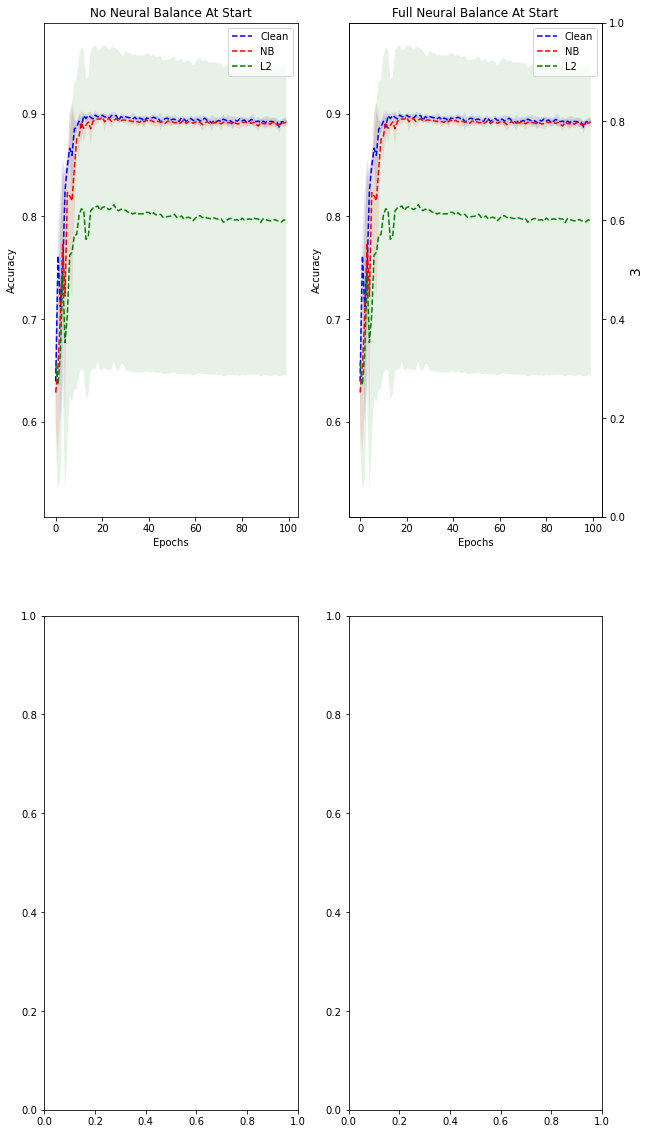

In [4]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 20))
xval = np.arange(0, 100)

for i,model in enumerate(['3']):
    for neuralBalanceAtStart in [0, 1]:
        for trainDataFrac in ['1']:
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][neuralBalanceAtStart].plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][neuralBalanceAtStart].plot(xval, mean, 'red', linestyle = '--', label = 'NB')
            axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
            l = []
            for seed in range(1,6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0.0001-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[i][neuralBalanceAtStart].plot(xval, mean, 'green', linestyle = '--', label = 'L2')
            axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)
        axs[i][neuralBalanceAtStart].legend()
        axs[i][neuralBalanceAtStart].set_ylabel('Accuracy')
        axs[i][neuralBalanceAtStart].set_xlabel('Epochs')

        if neuralBalanceAtStart == 1:
            taxis = axs[i][neuralBalanceAtStart].twinx()
            taxis.set_ylabel(model, fontsize=14)

axs[0][0].set_title('No Neural Balance At Start')
axs[0][1].set_title('Full Neural Balance At Start')
                


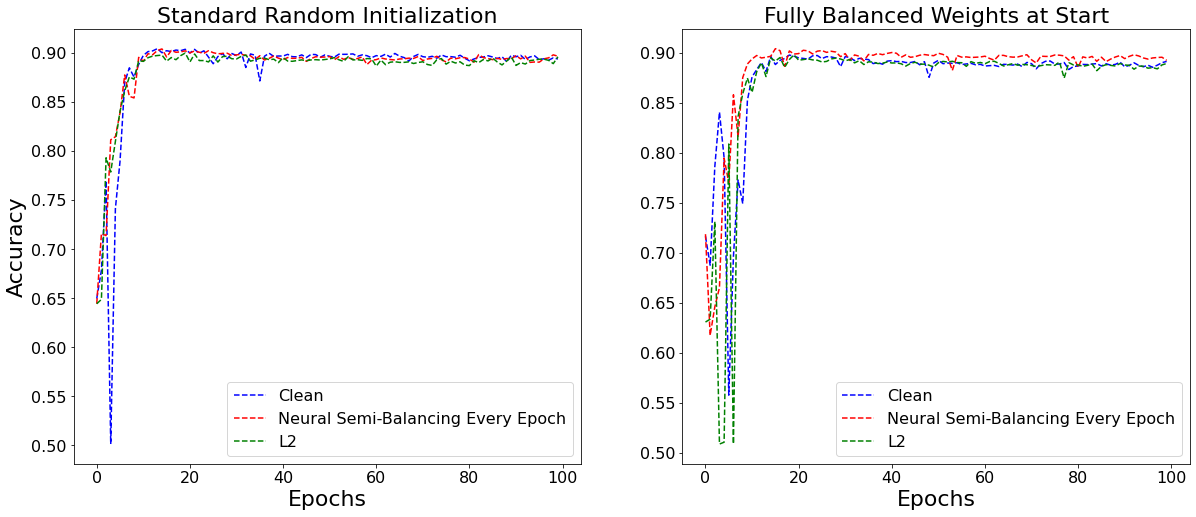

In [4]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20, 8))
xval = np.arange(0, 100)

for i,model in enumerate(['3']):
    for neuralBalanceAtStart in [0, 1]:
        for trainDataFrac in ['1']:
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[neuralBalanceAtStart].plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            # axs[neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[neuralBalanceAtStart].plot(xval, mean, 'red', linestyle = '--', label = 'Neural Semi-Balancing Every Epoch')
            # axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
            l = []
            for seed in range(55, 56):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_1e-06-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            axs[neuralBalanceAtStart].plot(xval, mean, 'green', linestyle = '--', label = 'L2')
            # axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)
        axs[neuralBalanceAtStart].legend(fontsize=16)
        axs[0].set_ylabel('Accuracy', fontsize = 22)
        axs[neuralBalanceAtStart].set_xlabel('Epochs', fontsize = 22)
        axs[neuralBalanceAtStart].tick_params(axis='y', labelsize=16)
        axs[neuralBalanceAtStart].tick_params(axis='x', labelsize=16)

        # if neuralBalanceAtStart == 1:
        #     taxis = axs[i][neuralBalanceAtStart].twinx()
        #     taxis.set_ylabel(model, fontsize=14)

axs[0].set_title('Standard Random Initialization', fontsize = 22)
axs[1].set_title('Fully Balanced Weights at Start', fontsize = 22)

plt.savefig('Rnn3Layers.pdf', dpi = 1000)
                


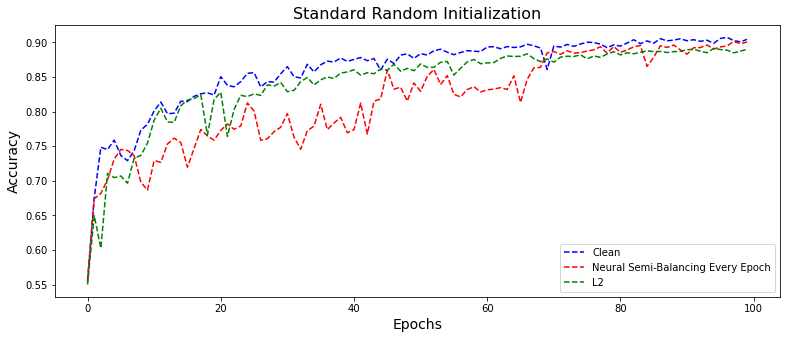

In [6]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
xval = np.arange(0, 100)

for i,model in enumerate(['3']):
    for neuralBalanceAtStart in [0]:
        for trainDataFrac in ['0.05']:
            l = []
            for seed in range(1, 6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            plt.plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            # axs[neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(1, 6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            plt.plot(xval, mean, 'red', linestyle = '--', label = 'Neural Semi-Balancing Every Epoch')
            # axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
            l = []
            for seed in range(1, 6):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0.0001-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            plt.plot(xval, mean, 'green', linestyle = '--', label = 'L2')
            # axs[i][neuralBalanceAtStart].fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)
        plt.legend()
        plt.ylabel('Accuracy', fontsize = 14)
        plt.xlabel('Epochs', fontsize = 14)

        # if neuralBalanceAtStart == 1:
        #     taxis = axs[i][neuralBalanceAtStart].twinx()
        #     taxis.set_ylabel(model, fontsize=14)

plt.title('Standard Random Initialization', fontsize = 16)

plt.savefig('Rnn3LayersRange.pdf', dpi = 1000)
                


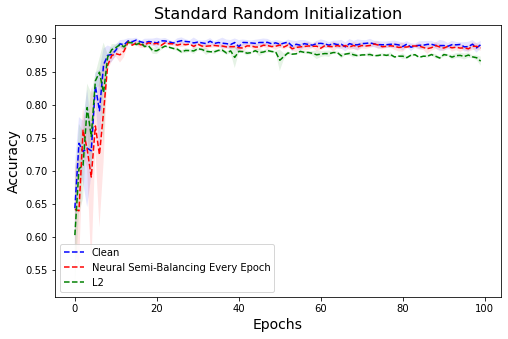

In [31]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
xval = np.arange(0, 100)

for i,model in enumerate(['3']):
    for neuralBalanceAtStart in [0]:
        for trainDataFrac in ['0.05']:
            l = []
            for seed in range(60, 63):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            plt.plot(xval, mean, 'blue', linestyle = '--', label = 'Clean')
            plt.fill_between(xval, mean-std, mean+std, facecolor='blue', alpha=.1)
            l = []
            for seed in range(60, 63):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0-seed_{seed}-neuralBalance_1-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            plt.plot(xval, mean, 'red', linestyle = '--', label = 'Neural Semi-Balancing Every Epoch')
            plt.fill_between(xval, mean-std, mean+std, facecolor='red', alpha=.1)
            l = []
            for seed in range(60, 63):
                with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/IMDB-model_{model}-l2Weight_0.0001-seed_{seed}-neuralBalance_0-neuralBalanceAtStart_{neuralBalanceAtStart}-trainDataFrac_{trainDataFrac}.pkl', 'rb') as f:
                    l.append(pickle.load(f)['test_acc'])
            l = np.array(l)
            mean = l.mean(axis=0)
            std = l.std(axis=0)
            plt.plot(xval, mean, 'green', linestyle = '--', label = 'L2')
            plt.fill_between(xval, mean-std, mean+std, facecolor='green', alpha=.1)
        plt.legend()
        plt.ylabel('Accuracy', fontsize = 14)
        plt.xlabel('Epochs', fontsize = 14)

        # if neuralBalanceAtStart == 1:
        #     taxis = axs[i][neuralBalanceAtStart].twinx()
        #     taxis.set_ylabel(model, fontsize=14)

plt.title('Standard Random Initialization', fontsize = 16)

plt.savefig('RNN5%.pdf', dpi = 1000)
                
